## **Human Activity Recognition with Smartphones | End To End Machine Learning Projects**

### This project is about classifying the human activities based on the smartphone data. The dataset is downloaded from kaggle. Data consist of various features and activitives. Activities are as follow:

*   Walking
*   Sitting
*   Standing
*   laying
*   Walking upstairs
*   Walking downstairs








In [1]:
# Importing required libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFE
import joblib


In [2]:
# reading the dataset

train_data = pd.read_csv("/content/train.csv")
test_data = pd.read_csv("/content/train.csv")

In [3]:
# displaying the first few rows of the train_data

train_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
# number of rows and columns in the trainig data

train_data.shape

(7352, 563)

In [5]:
# duplicate values

train_data.duplicated().any()

False

In [6]:
# duplicate values in columns

duplicate_col = train_data.columns[train_data.T.duplicated()].tolist()

In [7]:
duplicate_col

['tBodyAccMag-sma()',
 'tGravityAccMag-mean()',
 'tGravityAccMag-std()',
 'tGravityAccMag-mad()',
 'tGravityAccMag-max()',
 'tGravityAccMag-min()',
 'tGravityAccMag-sma()',
 'tGravityAccMag-energy()',
 'tGravityAccMag-iqr()',
 'tGravityAccMag-entropy()',
 'tGravityAccMag-arCoeff()1',
 'tGravityAccMag-arCoeff()2',
 'tGravityAccMag-arCoeff()3',
 'tGravityAccMag-arCoeff()4',
 'tBodyAccJerkMag-sma()',
 'tBodyGyroMag-sma()',
 'tBodyGyroJerkMag-sma()',
 'fBodyAccMag-sma()',
 'fBodyBodyAccJerkMag-sma()',
 'fBodyBodyGyroMag-sma()',
 'fBodyBodyGyroJerkMag-sma()']

In [8]:
len(duplicate_col)

21

In [9]:
train_data = train_data.drop(duplicate_col, axis=1)

In [10]:
train_data.shape

(7352, 542)

In [11]:
# missing values

train_data.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 542, dtype: int64

In [12]:
# checking the distribution of targeted variable which is activity

train_data['Activity']

0               STANDING
1               STANDING
2               STANDING
3               STANDING
4               STANDING
              ...       
7347    WALKING_UPSTAIRS
7348    WALKING_UPSTAIRS
7349    WALKING_UPSTAIRS
7350    WALKING_UPSTAIRS
7351    WALKING_UPSTAIRS
Name: Activity, Length: 7352, dtype: object

In [13]:
# Convert 'Activity' column to categorical data type

train_data['Activity'] = train_data['Activity'].astype('category')

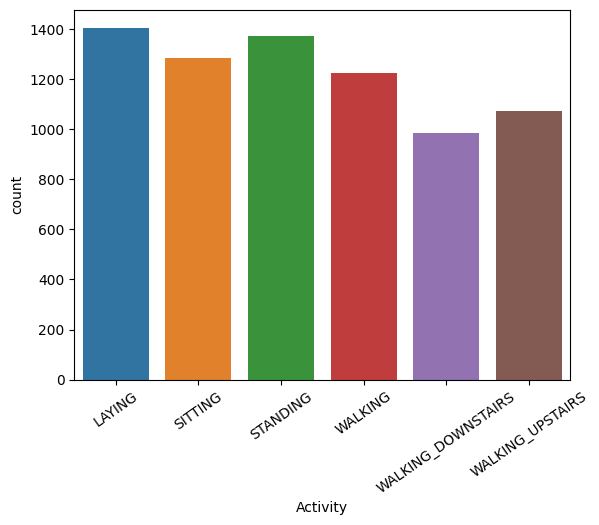

In [14]:
sns.countplot(data=train_data, x='Activity')
plt.xticks(rotation=35)
plt.show()

In [15]:
# assinging targeted value to the variable y

X = train_data.drop('Activity', axis=1)
y = train_data['Activity']

In [16]:
X

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30


In [17]:
y

0               STANDING
1               STANDING
2               STANDING
3               STANDING
4               STANDING
              ...       
7347    WALKING_UPSTAIRS
7348    WALKING_UPSTAIRS
7349    WALKING_UPSTAIRS
7350    WALKING_UPSTAIRS
7351    WALKING_UPSTAIRS
Name: Activity, Length: 7352, dtype: category
Categories (6, object): ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
                         'WALKING_UPSTAIRS']

In [18]:
# converting y into numerical values

le = LabelEncoder()  #creating instanace
y = le.fit_transform(y)

In [19]:
y

array([2, 2, 2, ..., 5, 5, 5])

In [20]:
# splitting dataset into Training and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [21]:
# traing logistic regression model, as this is the multi class classification problem

model_R = LogisticRegression()  #creating instance of Logistic Regression
model_R.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
y_pred1 = model_R.predict(X_test)
accuracy_score(y_test, y_pred1)

0.9809653297076818

In [23]:
# training random forest classifier
#create instance of random forest

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
y_pred2 = rf.predict(X_test)
accuracy_score(y_test, y_pred2)

0.9836845683208701

In [25]:
# feature selection (filter based k-best method)

k = 200
selector = SelectKBest(f_classif, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

selected_indices = selector.get_support(indices = True)
selected_features = X_train.columns[selected_indices]
print (selected_features)

Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z',
       'tBodyAcc-min()-X',
       ...
       'fBodyBodyGyroMag-mad()', 'fBodyBodyGyroMag-max()',
       'fBodyBodyGyroMag-iqr()', 'fBodyBodyGyroMag-entropy()',
       'fBodyBodyGyroJerkMag-mean()', 'fBodyBodyGyroJerkMag-mad()',
       'fBodyBodyGyroJerkMag-iqr()', 'fBodyBodyGyroJerkMag-entropy()',
       'angle(X,gravityMean)', 'angle(Y,gravityMean)'],
      dtype='object', length=200)


In [26]:
# feature selection (wrapper based rfe method)



In [27]:
estimator = RandomForestClassifier()

In [29]:
k = 100
rfe_selector = RFE(estimator, n_features_to_select=k)
X_train_selected_rfe = rfe_selector.fit_transform(X_train_selected, y_train)
X_test_selected_rfe = rfe_selector.transform(X_test_selected)

selected_indices_rfe = rfe_selector.get_support(indices=True)
selected_features_rfe = selected_features[selected_indices_rfe]
print(selected_features_rfe)

Index(['tBodyAcc-std()-X', 'tBodyAcc-mad()-X', 'tBodyAcc-max()-X',
       'tBodyAcc-energy()-X', 'tBodyAcc-entropy()-X', 'tGravityAcc-mean()-X',
       'tGravityAcc-mean()-Y', 'tGravityAcc-max()-X', 'tGravityAcc-max()-Y',
       'tGravityAcc-min()-X', 'tGravityAcc-min()-Y', 'tGravityAcc-energy()-X',
       'tGravityAcc-energy()-Y', 'tBodyAccJerk-std()-X',
       'tBodyAccJerk-std()-Y', 'tBodyAccJerk-std()-Z', 'tBodyAccJerk-mad()-X',
       'tBodyAccJerk-mad()-Y', 'tBodyAccJerk-mad()-Z', 'tBodyAccJerk-max()-X',
       'tBodyAccJerk-max()-Z', 'tBodyAccJerk-sma()', 'tBodyAccJerk-energy()-X',
       'tBodyAccJerk-energy()-Y', 'tBodyAccJerk-iqr()-X',
       'tBodyAccJerk-iqr()-Y', 'tBodyAccJerk-entropy()-X', 'tBodyGyro-std()-X',
       'tBodyGyro-std()-Z', 'tBodyGyro-mad()-X', 'tBodyGyro-mad()-Z',
       'tBodyGyro-max()-X', 'tBodyGyro-min()-X', 'tBodyGyro-sma()',
       'tBodyGyro-iqr()-X', 'tBodyGyro-iqr()-Y', 'tBodyGyro-iqr()-Z',
       'tBodyGyroJerk-std()-X', 'tBodyGyroJerk-std()-Z',
 

In [30]:
print(len(selected_features_rfe))

100


In [31]:
#training randomforestclassifier

rf = RandomForestClassifier()

In [32]:
rf.fit(X_train_selected_rfe, y_train)

RandomForestClassifier()

In [33]:
y_pred_rf = rf.predict(X_test_selected_rfe)

In [34]:
accuracy_score(y_test, y_pred_rf)

0.9782460910944936

In [35]:
joblib.dump(rf, "model_rfe")

['model_rfe']

In [36]:
joblib.dump(selector, "k_best_selector")

['k_best_selector']

In [37]:
joblib.dump(rfe_selector, "rfe_selector")

['rfe_selector']

In [38]:
test_data = test_data.drop("Activity", axis=1)

In [41]:
duplicated_col = test_data.columns[test_data.T.duplicated()].to_list()

In [43]:
test_data = test_data.drop(duplicated_col, axis=1)

In [44]:
model = joblib.load('model_rfe')

In [45]:
selector = joblib.load('k_best_selector')

In [46]:
rfe_selector = joblib.load('rfe_selector')

In [49]:
selector = selector.transform(test_data)

In [50]:
X_test_selected_rfe = rfe_selector.transform(selector)

In [52]:
model.predict(X_test_selected_rfe)

array([2, 2, 2, ..., 5, 5, 5])